# The Geometry of Epilepsy Detection

This kernel is my first try on the problem of Epilesy Detection.
. 
I recently learned a new algorithm, that I appreciate very much. It maps the feature space onto 2 dimensions and we can therefore get a glimpse of the geometry of the classification problem:
- Are the classes distinguishable by the features given?
- What Machine learning approach might work best for this problem?

## Background
The kernel uses the **Gaussian Naive Bayes**.

# Content
1. Loading the Libraries
2. Loadinging and preparing the data
3. Applying the algorithm
4. Visualization of the result
5. Interpretation of the Visualization
6. Trying GNB
7. What do you think?

## 1. Loading Libraries
We need only the standard libraries for this:
- numpy
- pandas
- matplotlib
- seaborn

In [12]:
# use numpy and pandas
import pickle
import numpy as np
import pandas as pd

# We need sklearn for preprocessing and for the TSNE Algorithm.
import sklearn
from sklearn.preprocessing import Imputer, scale
from sklearn.naive_bayes import GaussianNB

# WE employ a random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns

## 2. Loading and preparing the data
We load and prepare the data for the t-SNE Algorithm

### The t-SNE Algorithm expects
- numeric input
- no missing values are allowed
- the data must be sorted by its target

### Checks
- we check the data for missing values
- we check the data types for being numeric

### Transformations:
- there is a field 'Unamed: 0' which is categorical and which we remove.
- the target column is 'y'  has values 1,2,3,4,5. Since only 1 is an epileptic seizure and we are only interested in detecting those, we map all the normal cases 2,3,4,5 onto 0

### Sorting:
- we sort the data for the target column

### Split off Target
We split the target off the rest of the data, since this is what the t-SNE algorithm expects

In [13]:
# Loading the data
X = pd.read_csv('data.csv')
print("The data has {} observations and {} features".format(X.shape[0], X.shape[1]))
X

The data has 11500 observations and 180 features


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [14]:
# Are there null values in the dataframe?
cols_null_counts = X.apply(lambda x: sum(x.isnull()))
print('number of columns with null values:', len(cols_null_counts[cols_null_counts != 0]))

number of columns with null values: 0


In [15]:
# Any non numeric datatypes?
datatypes = X.dtypes
print('datatypes that are used: ', np.unique(datatypes.values))

# only the columns of type object concerns us
print('no of columns for dtype object: ', len(datatypes.values[datatypes.values == 'object']))
print('Columns of type object are: ', [col for col in X.columns if X[col].dtype == 'object'])
X['Unnamed: 0'].values[:10]

datatypes that are used:  [dtype('int64') dtype('O')]
no of columns for dtype object:  1
Columns of type object are:  ['Unnamed: 0']


array(['X21.V1.791', 'X15.V1.924', 'X8.V1.1', 'X16.V1.60', 'X20.V1.54',
       'X14.V1.56', 'X3.V1.191', 'X11.V1.273', 'X19.V1.874', 'X3.V1.491'], dtype=object)

In [16]:
# We drop the 'Unnamed: 0' column, maybe it is some internal adminstrative kind of information?
X.drop('Unnamed: 0', inplace=True, axis=1)

# we transform the target into 0 or 1: 0 for normal brain and 1 for the epileptic seizure
X['y'] = X['y'].apply(lambda x: 1 if x == 1 else 0)

# now we sort for the target
X.sort_values(by='y', inplace=True)

# We split the target off the fetures and store it seperately
y = X['y']
X.drop('y', inplace=True, axis=1)
assert 'y' not in X.columns

# make sure the target is binary now
assert set(y.unique()) == {0, 1}

# we also scale the data
X = scale(X) 
X

array([[  8.85051341e-01,   1.20992878e+00,   1.46276429e+00, ...,
         -6.34143672e-01,  -4.33290361e-01,  -2.35399216e-01],
       [ -5.68691031e-02,  -9.68877044e-02,  -8.44734925e-02, ...,
          1.45529575e-01,   6.40106173e-02,  -1.70120441e-02],
       [  9.54836410e-03,  -5.32571576e-04,  -1.72022848e-02, ...,
          5.34421836e-02,   7.01501355e-02,   7.39826106e-02],
       ..., 
       [  5.10698344e-01,   5.05331876e-01,   5.08736248e-01, ...,
          7.79988213e-02,   8.24291720e-02,   1.34645714e-01],
       [ -4.01032342e-01,  -4.94352627e-01,  -2.49593730e-01, ...,
          4.73030241e-02,   1.81377332e+00,   3.19813242e+00],
       [ -3.69775390e+00,  -3.52351711e+00,  -3.32572259e+00, ...,
         -9.16545006e-01,   4.93776895e-01,   2.10619657e+00]])

## 3. Applying the algorithm
We are now ready for applying the algorithm:

In [17]:
# run the Algorithm
epileptic_proj = TSNE(random_state=RS).fit_transform(X)
epileptic_proj

array([[ 22.90216255,  -8.09550667],
       [-20.70483589, -26.69696236],
       [  2.76418304,  -2.95890832],
       ..., 
       [-40.81045914,   4.77424479],
       [-31.63881111,  40.15476227],
       [ 61.40756226,   6.31429529]], dtype=float32)

## 4. Visualization of the result
In order to visualize the result we first build a function that produces the scatter plot from the data:
- each observation is plotted to a plain
- the color marks the observations as representing normal or epileptic brain activity

(<matplotlib.figure.Figure at 0x1a3ae622198>,
 <matplotlib.collections.PathCollection at 0x1a3af8baf98>)

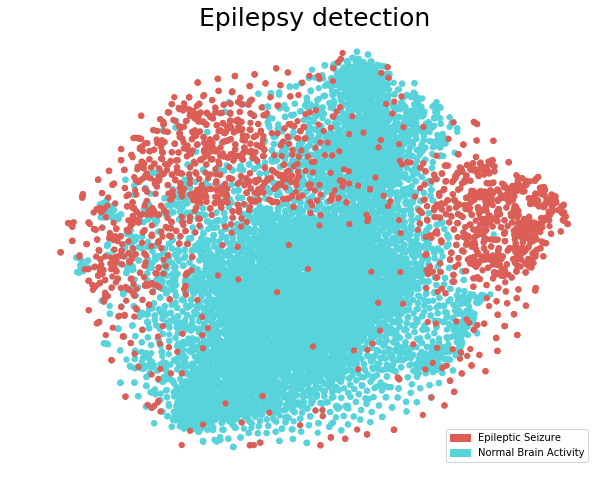

In [18]:
# building the scatter plot function: the target comes in as color, x is the data
def scatter(x, colors):
    """this function plots the result
    - x is a two dimensional vector
    - colors is a code that tells how to color them: it corresponds to the target
    """
    
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2)[::-1])

    # We create a scatter plot.
    f = plt.figure(figsize=(10, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)]
                   )
    
    ax.axis('off') # the axis will not be shown
    ax.axis('tight') # makes sure all data is shown
    
    # set title
    plt.title("Epilepsy detection", fontsize=25)
    
    # legend with color patches
    epilepsy_patch = mpatches.Patch(color=palette[1], label='Epileptic Seizure')
    normal_patch = mpatches.Patch(color=palette[0], label='Normal Brain Activity')
    plt.legend(handles=[epilepsy_patch, normal_patch], fontsize=10, loc=4)

    return f, ax, sc

# Now we call the scatter plot function on our data
scatter(epileptic_proj, y)

## 5. Interpretation of the Visualization

### The normal zone is in the middle
- there is a big "normal" area in the middle
- the epileptic zone is on the borders
- there two epleptic borders

### Conclusions for choosing a machine learning algorithm
- we can try GNB
- randomForest or XgBoost might work
- linear regression might not be very successful

## 6. Implementing K Nearest Neighbour Algorithm
I want to compare K Nearest Neighbor Application on the original dataset with that applied to the t-SNE transformation: 
- therefore I am building a function doing the scoring

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def apply_gnb(X):
    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=test_size, random_state=seed)

    # fit model no training data
    model = GaussianNB()
    model.fit(X_train, y_train)
    pickle.dump(model, open("finalized_model.sav", 'wb'))
    print(model)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test, predictions)
    print("Area Under the Receiver Operating Characteristic Curve: %.2f%%" % roc_auc)

## Applying GNB on the original dataset

In [24]:
apply_gnb(X)

GaussianNB(priors=None)
Accuracy: 95.63%
Area Under the Receiver Operating Characteristic Curve: 0.93%
